In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
X,y = mnist.data, mnist.target


In [5]:
import matplotlib.pyplot as plt
import matplotlib
some_digit = X.iloc[36000]
some_digit_image = some_digit.values.reshape(28,28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

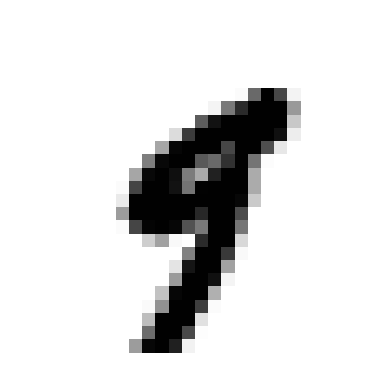

In [6]:
plt.imshow(some_digit_image, interpolation="nearest", cmap = matplotlib.cm.binary)
plt.axis("off")

In [7]:
y[36000]
y = y.astype(np.uint8)

## train test split


In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## tranning a binary classifier

### the 5 detector

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [11]:
sgd.predict([some_digit])

d:\Hands on ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

## check the cross validation score

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd,X_train,y_train_5,cv=3,n_jobs=-1)

In [13]:
print(scores)

[0.95035 0.96035 0.9604 ]


In [14]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(sgd,X_train,y_train_5,cv=3,n_jobs=-1)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,pred)

array([[53892,   687],
       [ 1891,  3530]])

### precision and recall


In [16]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,pred))
print(recall_score(y_train_5,pred))

0.8370879772350012
0.6511713705958311


In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5,pred)

0.7325171197343847

### decision functions


In [18]:
y_scores = cross_val_predict(sgd,X_train,y_train_5,cv=3,method="decision_function")

In [19]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

## precision recall curve

In [20]:
from sklearn.metrics import precision_recall_curve
precisions,recall,thresholds = precision_recall_curve(y_train_5,y_scores)

In [21]:
def plot_precision_recall_vs_threshold(precisions,recall,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--" ,label ="precision")
    plt.plot(thresholds,recall[:-1],"g-",label ="recall")
    plt.legend()

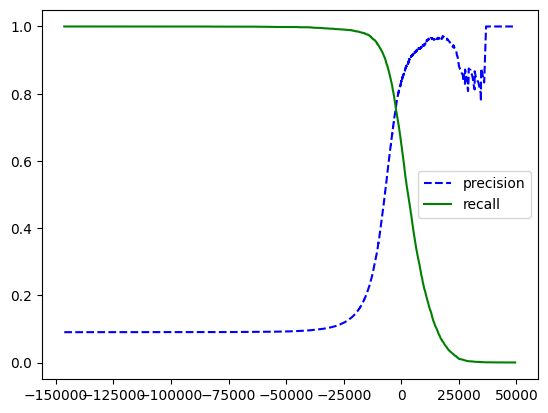

In [22]:
plot_precision_recall_vs_threshold(precisions,recall,thresholds)


## The ROC curve

In [25]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train_5,y_scores)

C:\Users\DEV BANSAL\AppData\Local\Temp\ipykernel_99196\234057037.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


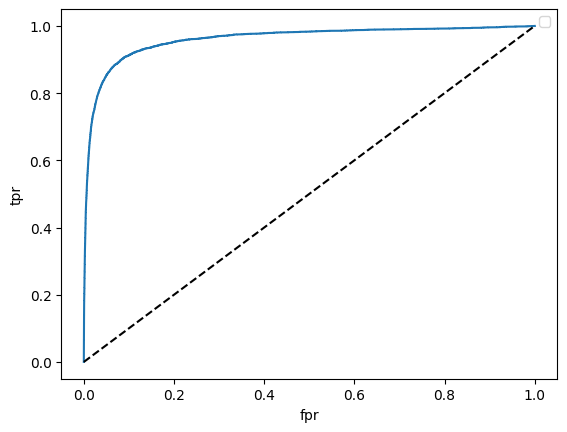

In [30]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"k--")
[...]
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

## Random forsest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [34]:
y_proba_rf = cross_val_predict(rf,X_train,y_train_5,cv=3,method="predict_proba")

In [35]:
y_scores_rf = y_proba_rf[:,1]
fpr_forest, tpr_forest, threshold_torest = roc_curve(y_train_5,y_scores_rf)

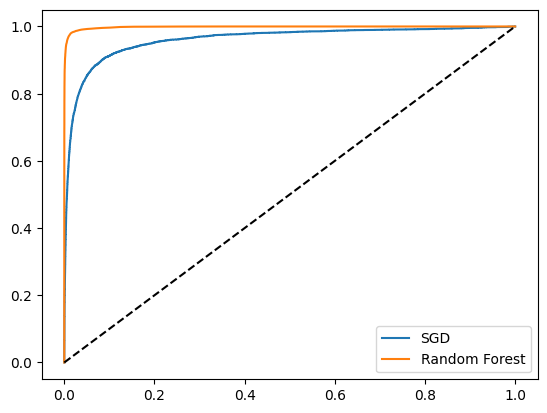

In [44]:
plt.plot(fpr,tpr, label = "SGD")
plt.plot(fpr_forest,tpr_forest, label = "Random Forest")
plt.legend()
plt.plot([0,1],[0,1],"k--")


In [48]:
print(roc_auc_score(y_train_5,y_scores_rf))




0.9983436731328145


# Multicalss Clasissification

## Support Vector Machines

In [50]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
svm.predict([some_digit])

d:\Hands on ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([9], dtype=uint8)

In [54]:
some_digit_scores = svm.decision_function([some_digit])
some_digit_scores

d:\Hands on ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.70506637,  4.89592396, -0.30950599,  4.16189729,  8.30179856,
         3.10412968,  0.69948562,  7.2532168 ,  6.26258543,  9.30853114]])

## One vs Rest Classifier

In [55]:
from sklearn.multiclass import OneVsOneClassifier

In [56]:
ovr = OneVsOneClassifier(SVC())
ovr.fit(X_train,y_train)

,estimator,SVC()
,n_jobs,None
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200


In [57]:
ovr.predict([some_digit])

d:\Hands on ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([9], dtype=uint8)

# Multilabel Classification

In [58]:
from sklearn.neighbors import KNeighborsClassifier


In [59]:
y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 == 1)
y_multiclass = np.c_[y_train_large,y_train_odd]

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_multiclass)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [61]:
knn.predict([some_digit])

d:\Hands on ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ True,  True]])